Coefficients: [ 2.76592929  2.43467449  0.59098829  0.20269575 -0.06245252  0.
 -0.33006679  0.         -0.          0.5462212 ]
Selected Features: [0 1 2 3 4 6 9]
MSE: 0.8810361352147746


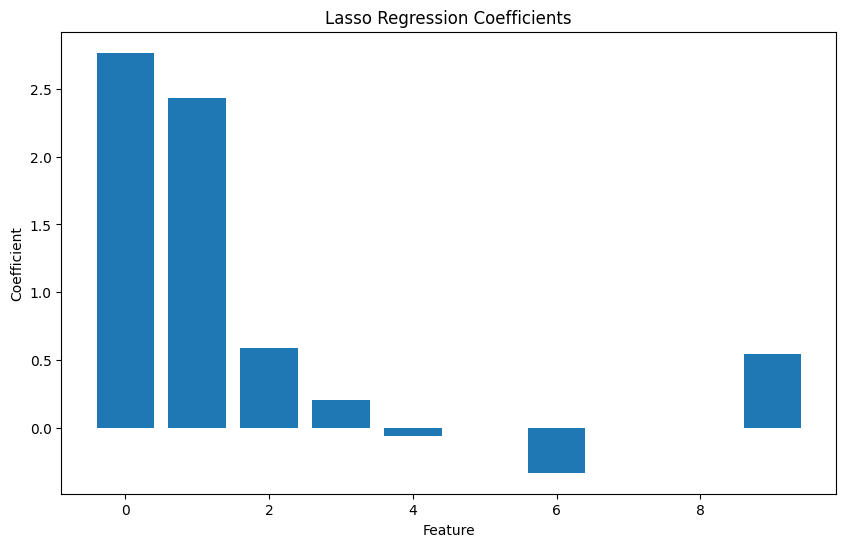

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt


# Sample dataset
np.random.seed(0)
X = np.random.rand(100, 10)
y = 3 * X[:, 0] + 2 * X[:, 1] + np.random.randn(100)


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Lasso Regression for feature selection
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_train, y_train)


# Get coefficients
coefficients = lasso.coef_
print("Coefficients:", coefficients)


# Select features with non-zero coefficients
selection = SelectFromModel(lasso)
X_train_selected = selection.fit_transform(X_train, y_train)
X_test_selected = selection.transform(X_test)


# Print selected features
print("Selected Features:", np.where(coefficients != 0)[0])


# Train Random Forest model on selected features
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train_selected, y_train)


# Evaluate model
y_pred = rf.predict(X_test_selected)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)


# Plot coefficients
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), coefficients)
plt.xlabel("Feature")
plt.ylabel("Coefficient")
plt.title("Lasso Regression Coefficients")
plt.show()

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


# Load Titanic dataset
titanic_url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_df = pd.read_csv(titanic_url)

titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
# Drop NaN values
titanic_df.dropna(inplace=True)


# Check column names
print(titanic_df.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [12]:
# Preprocess data
titanic_df = pd.get_dummies(titanic_df, columns=['Sex', 'Embarked'])
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,True,False,True,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,True,False,False,False,True
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,False,True,False,False,True
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",4.0,1,1,PP 9549,16.7000,G6,True,False,False,False,True
11,12,1,1,"Bonnell, Miss. Elizabeth",58.0,0,0,113783,26.5500,C103,True,False,False,False,True


In [13]:
titanic_df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [14]:
titanic_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
1,2,1,1,38.0,1,0,71.2833,True,False,True,False,False
3,4,1,1,35.0,1,0,53.1000,True,False,False,False,True
6,7,0,1,54.0,0,0,51.8625,False,True,False,False,True
10,11,1,3,4.0,1,1,16.7000,True,False,False,False,True
11,12,1,1,58.0,0,0,26.5500,True,False,False,False,True


In [15]:
# Split data into features (X) and target (y)
X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']

X

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
1,2,1,38.0,1,0,71.2833,True,False,True,False,False
3,4,1,35.0,1,0,53.1000,True,False,False,False,True
6,7,1,54.0,0,0,51.8625,False,True,False,False,True
10,11,3,4.0,1,1,16.7000,True,False,False,False,True
11,12,1,58.0,0,0,26.5500,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,47.0,1,1,52.5542,True,False,False,False,True
872,873,1,33.0,0,0,5.0000,False,True,False,False,True
879,880,1,56.0,0,1,83.1583,True,False,True,False,False
887,888,1,19.0,0,0,30.0000,True,False,False,False,True


In [16]:
y

,Survived
1,1
3,1
6,0
10,1
11,1
...,...
871,1
872,0
879,1
887,1


In [17]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train.shape,X_test.shape,y_train.shape,y_test.shape

((146, 11), (37, 11), (146,), (37,))

In [18]:
# Lasso Regression for feature selection
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_train, y_train)


# Get coefficients
coefficients = lasso.coef_
print("Coefficients:", coefficients)


Coefficients: [ 1.76289510e-04 -3.28566494e-02 -4.24384474e-03  0.00000000e+00
 -3.56558595e-02  3.35830435e-04  4.35032953e-01 -0.00000000e+00
  8.52686424e-02 -0.00000000e+00 -0.00000000e+00]


In [19]:
# Select features with non-zero coefficients
selection = SelectFromModel(lasso)
X_train_selected = selection.fit_transform(X_train, y_train)
X_test_selected = selection.transform(X_test)


# Print selected features
print("Selected Features:", X.columns[coefficients != 0])

Selected Features: Index(['PassengerId', 'Pclass', 'Age', 'Parch', 'Fare', 'Sex_female',
       'Embarked_C'],
      dtype='object')


In [20]:
# Train Random Forest model on selected features
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_selected, y_train)


# Evaluate model
y_pred = rf.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.6756756756756757
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.43      0.50        14
           1       0.70      0.83      0.76        23

    accuracy                           0.68        37
   macro avg       0.65      0.63      0.63        37
weighted avg       0.66      0.68      0.66        37



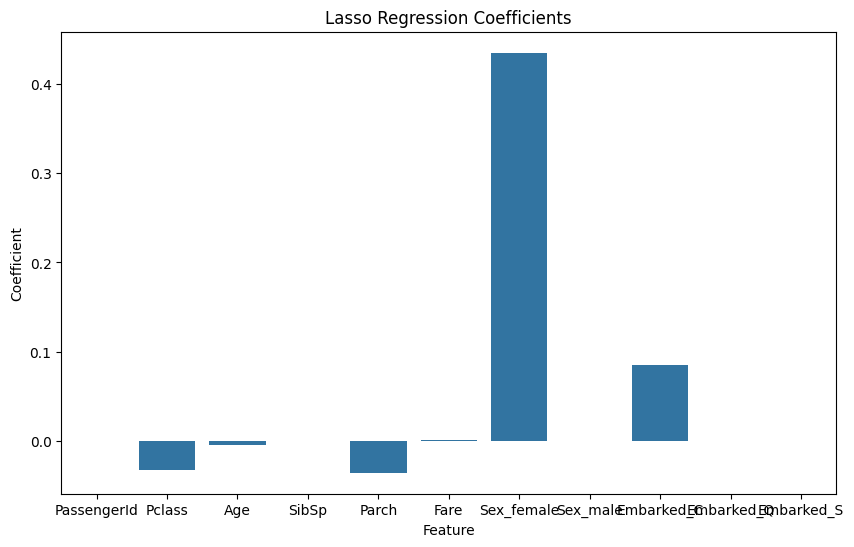

In [21]:
# Plot coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x=X.columns, y=coefficients)
plt.xlabel("Feature")
plt.ylabel("Coefficient")
plt.title("Lasso Regression Coefficients")
plt.show()